In [ ]:
import pyscreenshot as ImageGrab
import time
import os

images_folder = "captured_images/33/"
if not os.path.exists(images_folder):
    os.makedirs(images_folder)

capture_count = 28

def capture_images():
    global capture_count
    if capture_count < 100:
        im = ImageGrab.grab()

        im.save(f"{images_folder}image_{capture_count}.png")
        print(f"Successfully saved: image_{capture_count}.png")
        
        capture_count += 1
        
        time.sleep(8)
        capture_images()

capture_images()


Successfully saved: image_28.png
Successfully saved: image_29.png
Successfully saved: image_30.png


KeyboardInterrupt: 

In [ ]:
import os
from PIL import Image

input_folder = 'captured_images/33/'
output_folder = 'captured_images/33/'

os.makedirs(output_folder, exist_ok=True)

target_width = 336
target_height = 279

def crop_to_target_size(image, target_width, target_height):
    width, height = image.size
    
    if width >= target_width and height >= target_height:
        left = (width - target_width) // 2
        upper = (height - target_height) // 2
        right = left + target_width
        lower = upper + target_height

        return image.crop((left, upper, right, lower))
    else:
        print(f"Image {image.filename} is too small for the target size.")
        return image

for filename in os.listdir(input_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, filename)

        image = Image.open(image_path)

        cropped_image = crop_to_target_size(image, target_width, target_height)

        output_path = os.path.join(output_folder, filename)
        cropped_image.save(output_path)

        print(f"Cropped and saved {filename} to {output_folder}")

print("Cropping completed for all images.")


Cropping completed for all images.


In [8]:
import cv2
import csv
import glob

header = ["label"] + [f"pixel{i}" for i in range(28 * 28)]

with open('dataset.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    
    for label in range(10):
        dir_list = glob.glob(f"captured_images/{label}/*.png") 
        
        for img_path in dir_list:
            try:
                im = cv2.imread(img_path)

                if im is None:
                    print(f"Skipping {img_path}: Unable to read the image.")
                    continue

                im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
                
                im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
                
                roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)
                _, roi = cv2.threshold(roi, 100, 255, cv2.THRESH_BINARY)

                data = [label] + [1 if pixel > 0 else 0 for pixel in roi.flatten()]

                writer.writerow(data)
            
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

print("Dataset creation complete!")


Dataset creation complete!


In [11]:
import pandas as pd 
from sklearn.utils import shuffle 
 
data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
866      8       0       0       0       0       0       0       0       0   
150      1       0       0       0       0       0       0       0       0   
930      9       0       0       0       0       0       0       0       0   
35       0       0       0       0       0       0       0       0       0   
326      3       0       0       0       0       0       0       0       0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
3        0       0       0       0       0       0       0       0       0   
183      1       0       0       0       0       0       0       0       0   
127      1       0       0       0       0       0       0       0       0   
791      7       0       0       0       0       0       0       0       0   
362      3       0       0       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel

In [12]:
X = data.drop(["label"],axis=1)
Y= data["label"]

3


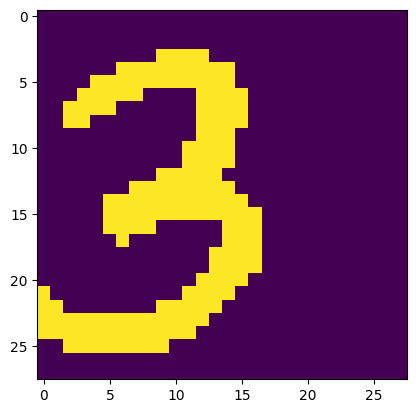

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
idx = 314
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

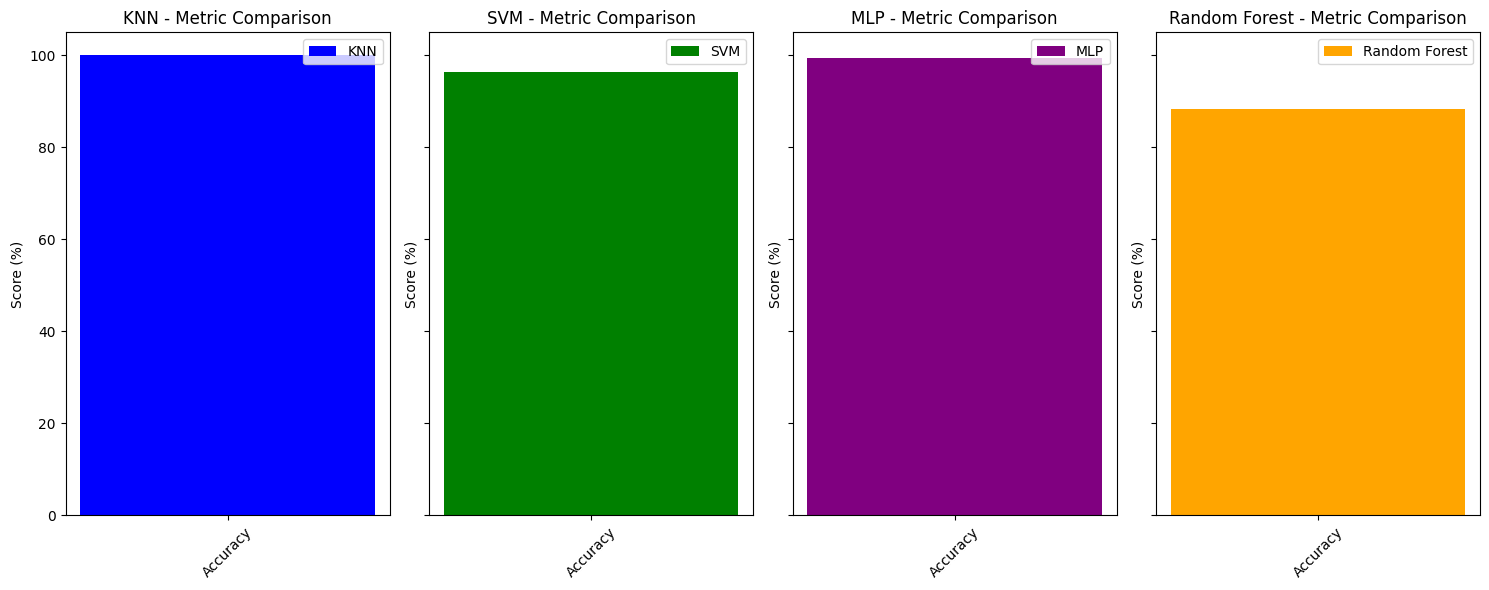

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df_results = pd.read_csv('analysis.csv')

metrics = df_results['Metric'].unique()
models = df_results['Model'].unique()

model_scores = {model: [] for model in models}

for model in models:
    for metric in metrics:
        score = df_results.loc[(df_results['Model'] == model) & (df_results['Metric'] == metric), 'Score'].values
        model_scores[model].append(score[0] if len(score) > 0 else 0)

max_score = max([max(scores) for scores in model_scores.values()])
scaled_model_scores = {model: [score / max_score * 100 for score in scores] for model, scores in model_scores.items()}

bar_width = 0.1
index = range(len(metrics))

colors = ['blue', 'green', 'purple', 'orange']

fig, axs = plt.subplots(1, len(models), figsize=(15, 6), sharey=True)

for i, (model, color) in enumerate(zip(models, colors)):
    axs[i].bar(index, scaled_model_scores[model], bar_width, label=model, color=color)
    axs[i].set_ylabel('Score (%)')
    axs[i].set_title(f'{model} - Metric Comparison')
    axs[i].set_xticks(index)
    axs[i].set_xticklabels(metrics, rotation=45)
    axs[i].legend()

plt.tight_layout()
plt.show()
